In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

%matplotlib inline 

In [29]:
test_data = pd.read_csv("champ1_test_.csv", 
                        sep=',', 
#                         decimal=',', 
#                         true_values=u'да',
#                         false_values=u'нет',
                        quoting=True, 
                        encoding = "UTF-8")

# INFO #

In [30]:
print u'Размер данных: ', test_data.shape

Размер данных:  (5404, 31)


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 31 columns):
_ID_            5404 non-null int64
_CITY_          5404 non-null object
_ADRS_          5402 non-null object
_OBJ_TYPE_      5404 non-null object
_TTL_S_         5404 non-null object
_F1_S_          4927 non-null object
_F1_U_          4364 non-null object
_FC_S_          3463 non-null object
_FC_U_          1027 non-null object
_F0_S_          3600 non-null object
_F0_U_          1170 non-null object
_FA_S_          3367 non-null object
_FA_U_          803 non-null object
_F2_S_          3202 non-null object
_F2_U_          999 non-null object
_F3_S_          3081 non-null object
_F3_U_          711 non-null object
_AREA_          5388 non-null object
_CHARACT_       5391 non-null object
_LINE_          5397 non-null object
_METRO_         4850 non-null object
_ROUND_         5396 non-null object
_FOOT_TRAF_     5395 non-null object
_IS_PRKNG_      5401 non-null object
_IS_WIN_ 

In [32]:
test_data.head()

,_ID_,_CITY_,_ADRS_,_OBJ_TYPE_,_TTL_S_,_F1_S_,_F1_U_,_FC_S_,_FC_U_,_F0_S_,...,_ROUND_,_FOOT_TRAF_,_IS_PRKNG_,_IS_WIN_,_IS_SEP_ENT_,_IS_VENT_,_DECOR_,_IS_COM_,_F1_H_,_DATE_
0,0,г. Санкт-Петербург,"1-я Красноармейская ул., д.8-10, лит.А",помещение,"184,7","184,7",торговое,0,NaN,0,...,жилая застройка,очень высокий,городская парковка,да,да,центральная вентиляция,рабочее состояние,все,"2,7",19.04.2016
1,1,г. Санкт-Петербург,"пр. Просвещения, д. 54, лит. А",помещение,"284,8","284,8",торговое,0,NaN,0,...,жилая застройка,низкий,нет,да,да,нет,рабочее состояние,все,"3/3,1/2,95",06.04.2016
2,2,г. Санкт-Петербург,"Кондратьевский, д. 51, корп. 1, лит. А",помещение,"59,6","59,6",торговое,0,NaN,0,...,жилая застройка,средний,нет,да,да,нет,рабочее состояние,все,"2,75",11.04.2016
3,3,г. Санкт-Петербург,"ул. Лизы Чайкиной, д. 17, лит. А",помещение,"186,1",90,торговое,0,NaN,"96,1",...,жилая застройка,средний,нет,да,да,нет,рабочее состояние,все,"1,65/3,65",11.04.2016
4,4,г. Санкт-Петербург,"ул. Лизы Чайкиной, д. 18, лит. А",помещение,"73,3","73,3",торговое,0,NaN,0,...,жилая застройка,средний,нет,нет,да,нет,рабочее состояние,все,4,11.04.2016


In [60]:
#unused_col
unused_cols = ['_ID_']

#numerical
numerical_cols = []
for col in test_data.columns:
    if re.search('.*?_S_$', col) or re.search('.*?_H_$', col):   
        numerical_cols.append(col)
print "Числовые признаки:", numerical_cols, '\n'

#datetime
datetime_cols = ['_DATE_']
print "Дата-время:", datetime_cols, '\n'

#boolean
boolean_cols = ['_IS_WIN_', '_IS_SEP_ENT_']
print "Бинарные признаки:", boolean_cols, '\n'

#categorial
categorial_cols = list(set(test_data.columns) - 
                       set(numerical_cols) - 
                       set(datetime_cols) - 
                       set(boolean_cols) -
                       set(unused_cols))
print "Категориальные признаки:", categorial_cols                                                                     

Числовые признаки: [u'_TTL_S_', u'_F1_S_', u'_FC_S_', u'_F0_S_', u'_FA_S_', u'_F2_S_', u'_F3_S_', u'_F1_H_'] 

Дата-время: ['_DATE_'] 

Бинарные признаки: ['_IS_WIN_', '_IS_SEP_ENT_'] 

Категориальные признаки: [u'_IS_COM_', u'_F1_U_', u'_CITY_', u'_ADRS_', u'_ROUND_', u'_IS_PRKNG_', u'_IS_VENT_', u'_CHARACT_', u'_METRO_', u'_FA_U_', u'_DECOR_', u'_FOOT_TRAF_', u'_AREA_', u'_LINE_', u'_FC_U_', u'_OBJ_TYPE_', u'_F3_U_', u'_F2_U_', u'_F0_U_']


# PREPROCESSING #

Разбираем unicode-строки для выделения типа `float`, `datetime`, `boolean`

In [34]:
def as_float(x):
    try:
        return float(x.replace(',','.').encode('utf-8'))
    except:
        return np.nan
    
def as_datetime(x):
    try:
        return pd.to_datetime(x.encode('utf-8'))
    except:
        return np.nan
    
def as_boolean(x):
    return x == u'да'

In [35]:
for col in numerical_cols:
    print col
    test_data[col] = test_data[col].apply(as_float)

_TTL_S_
_F1_S_
_FC_S_
_F0_S_
_FA_S_
_F2_S_
_F3_S_
_F1_H_


In [36]:
for col in datetime_cols:
    print col
    test_data[col] = test_data[col].apply(as_datetime)

_DATE_


In [37]:
for col in boolean_cols:
    print col
    test_data[col] = test_data[col].apply(as_boolean)

_IS_WIN_
_IS_SEP_ENT_


# DESCRIPTION #

Обработанный набор данных

In [38]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
_ID_,5404.0,2701.500000,1560.144758,0.0,1350.75,2701.5,4052.25,5403.0
_TTL_S_,5403.0,301.381473,340.565616,1.5,NaN,NaN,NaN,3293.2
_F1_S_,4897.0,219.001315,263.763038,-0.0,NaN,NaN,NaN,3245.3
_FC_S_,3181.0,28.126008,111.657772,0.0,NaN,NaN,NaN,1458.3
_F0_S_,3320.0,40.187529,116.843624,0.0,NaN,NaN,NaN,1297.3
_FA_S_,3063.0,1.992132,29.886259,0.0,NaN,NaN,NaN,1179.9
_F2_S_,3064.0,65.418773,182.614512,0.0,NaN,NaN,NaN,3164.0
_F3_S_,2944.0,45.564912,179.259410,0.0,NaN,NaN,NaN,3293.2
_F1_H_,3961.0,3.076973,0.781018,-0.0,NaN,NaN,NaN,12.0


In [39]:
test_data.describe(include=['bool']).transpose()

,count,unique,top,freq
_IS_WIN_,5404,2,False,4185
_IS_SEP_ENT_,5404,2,True,4427


In [40]:
test_data.describe(include=['object']).transpose()

,count,unique,top,freq
_CITY_,5404,943,Красноярск,233
_ADRS_,5402,4368,"Калужская область, г. Обнинск, ЦНТ и ЭОУ ""Эврика""",103
_OBJ_TYPE_,5404,9,помещение,4584
_F1_U_,4364,9,торговое,2997
_FC_U_,1027,9,-0,310
_F0_U_,1170,9,-0,329
_FA_U_,803,9,-0,450
_F2_U_,999,8,офисное,360
_F3_U_,711,7,офисное,363
_AREA_,5388,5,спальный район,2260


## HISTOGRAM ##

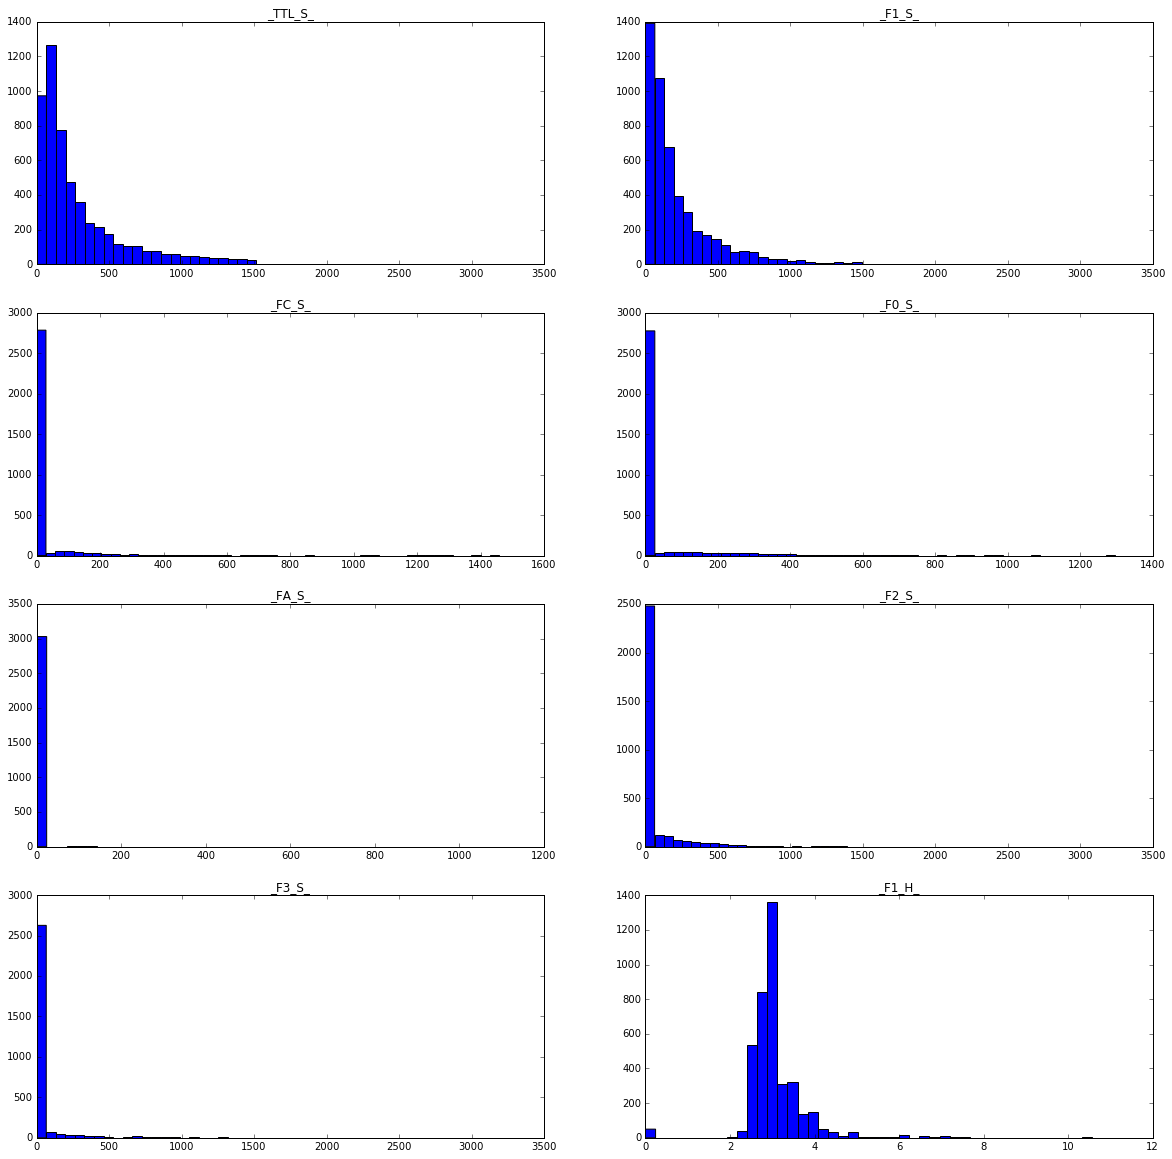

In [47]:
plt.figure(figsize=(20,20))
i = 1
for col in numerical_cols:
    plt.subplot(4,2,i)
    i += 1
    plt.hist(test_data[col].dropna(), bins=50)
    plt.title(col)
plt.show()

## UNIQUE VALUES ##

### Назначение площадей ###

In [15]:
test_data[u'_F1_U_'].value_counts()

торговое               2997
офисное                 931
складское               253
-0                      108
техническое              55
0                        17
торгово-офисное           1
торговое/складское        1
торговое, складское       1
Name: _F1_U_, dtype: int64

In [16]:
test_data[u'_FC_U_'].value_counts()

-0             310
торговое       226
офисное        159
0               97
не указано      77
Не указано      77
нет данных      51
складское       22
техническое      8
Name: _FC_U_, dtype: int64

In [17]:
test_data[u'_F0_U_'].value_counts()

-0             329
торговое       199
складское      162
техническое    108
0               90
офисное         84
не указано      75
Не указано      75
нет данных      48
Name: _F0_U_, dtype: int64

In [18]:
test_data[u'_FA_U_'].value_counts()

-0             450
0               99
Не указано      82
не указано      80
нет данных      52
торговое        21
офисное         13
техническое      5
складское        1
Name: _FA_U_, dtype: int64

In [19]:
test_data[u'_F2_U_'].value_counts()

офисное              360
торговое             273
-0                   233
0                     88
складское             25
техническое           17
жилье                  2
офисное/складское      1
Name: _F2_U_, dtype: int64

## RESULTS ##

Грязные данные. Требуется сильная предобработка, включая выделение смысловой части из адреса, назначения площадей